In [ ]:
%matplotlib inline
#%matplotlib nbagg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm, animation
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset
from matplotlib.animation import FuncAnimation

import scipy.stats as stats

In [59]:
ds = xarray.open_mfdataset(folder+'/*Nov.aave.nc',data_vars=['VAR_2T'],coords='different')
ds['VAR_2T'][:,0,0].values
T2m = np.reshape(ds['VAR_2T'][:,0,0].values,(20,30,24))

array([298.6731 , 298.45425, 298.23773, ..., 301.91025, 299.40585,
       298.7671 ], dtype=float32)

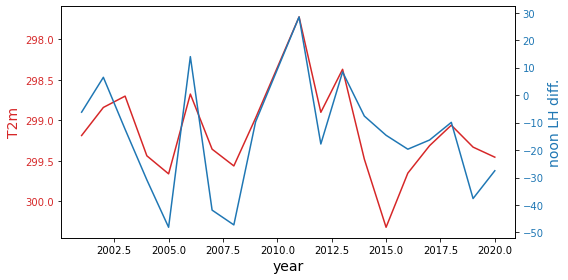

In [115]:
### overlay the 15-mean local noon (about 1pm) LH differences 
mean_LH = np.array([ -6.19893217,   6.49842358, -12.43856049, -30.85922432,
       -48.1177063 ,  14.03161526, -41.87017441, -47.24987411,
        -9.70894909,  28.48993492, -17.78701591,   8.44867516,
        -7.61617136, -14.61014366, -19.68271065, -16.33692932,
        -9.9053793 , -37.65141678, -27.52505684])
year1=np.arange(2001,2010)
years=np.append(year1,np.arange(2011,2021))
T2m_tmp = T2m[:,0:15,:].mean(axis=2).mean(axis=1)
T2m_mean = T2m_tmp[np.append(np.arange(0,9),np.arange(10,20))]

fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('year',fontsize=14)
ax1.set_ylabel('T2m', color=color,fontsize=14)
ax1.plot(years, T2m_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_yaxis()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('noon LH diff.', color=color,fontsize=14)  # we already handled the x-label with ax1
ax2.plot(years,mean_LH, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
ax1.grid(None)
ax2.grid(True)

In [96]:
np.append(np.arange(0,10),np.arange(11,21))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])